##Bring in libraries and dataframes and set indexes

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline

In [2]:
#Read in data calibrated VWC data
Data = pd.read_pickle('.\DataFrames\LysoVWC_df')

## Set time slice to graph

In [3]:
from datetime import timedelta #Import function needed for doing date deltas 
EndDate = Data.index.max()  #Set end of series as most recent date in file
EndDateString = EndDate.strftime("%Y-%m-%d")  #Turn this to a string
PlotDuration = 1
#Set the duration that you want to graph for
StartDate = EndDate - timedelta(weeks=PlotDuration)       #Set start date the specified duration before the end date 
StartDateString = StartDate.strftime("%Y-%m-%d")           #Turn that into a string
EndDate

Timestamp('2017-10-30 06:30:00')

##Graph all sensors to check for anomolies

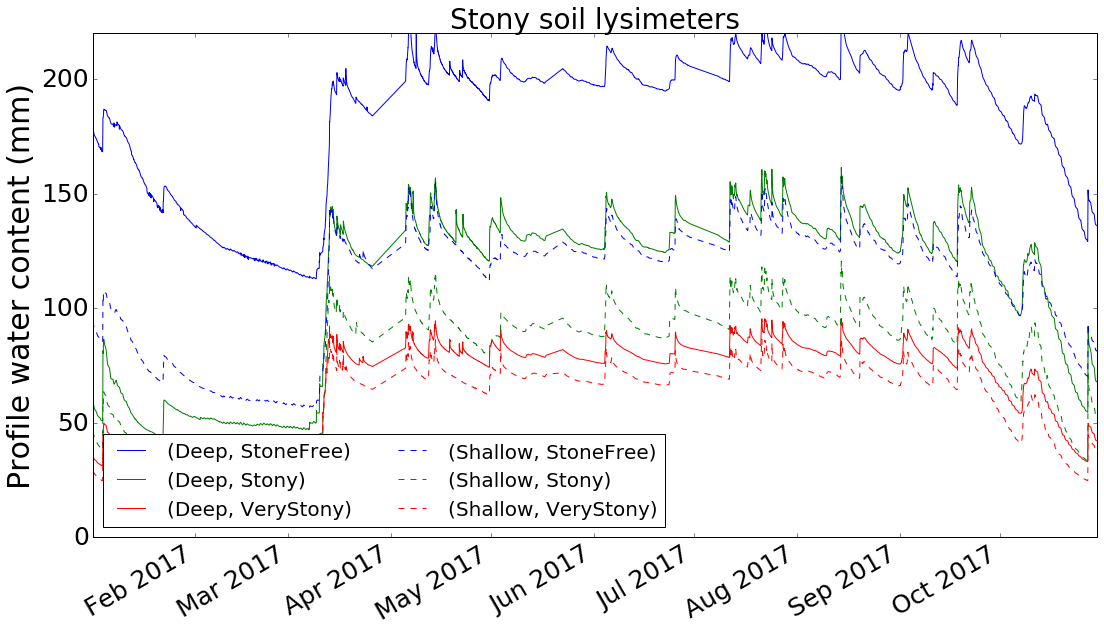

In [4]:
#Calculate treatment means omitting data prior to 2014-11-05 08:00:00 to avoid NaN values
#DataMeans =  Data.ix['2014-11-05 08:00:00':].groupby(level=['Depth','Gravels','Stones'],axis=1).mean()
DataMeans =  Data.ix['2017-01-01 08:00:00':].groupby(level=['Depth','Gravels','Stones'],axis=1).mean()
DataMeans =  DataMeans.dropna(axis=1) #For some reason it keeps non valid combinations in so need to extract with this function
DataMeans.where(DataMeans<0.7,np.nan,inplace=True)

#Calculate the water content of the soil profile by multiplying the volumetric water content by each layers
#depth and summing.  The 0-15 layers are divided by 2 to average the two readings
ProfileWater = DataMeans.ix[:,'D1'] * 150 + \
               DataMeans.ix[:,'D2'] * 150 + \
               DataMeans.ix[:,'D3'] * 150 + \
               DataMeans.ix[:,'D4'] * 150 
                
ProfileWater.plot(figsize=(18,10),style=['b-','g-','r-','b--','g--','r--'],ylim=(0,220))
plt.ylabel('Profile water content (mm)', fontsize=30);
plt.tick_params(labelsize=25)
plt.title('Stony soil lysimeters', fontsize=28)
plt.legend(fontsize = 20, loc=3, ncol=2)

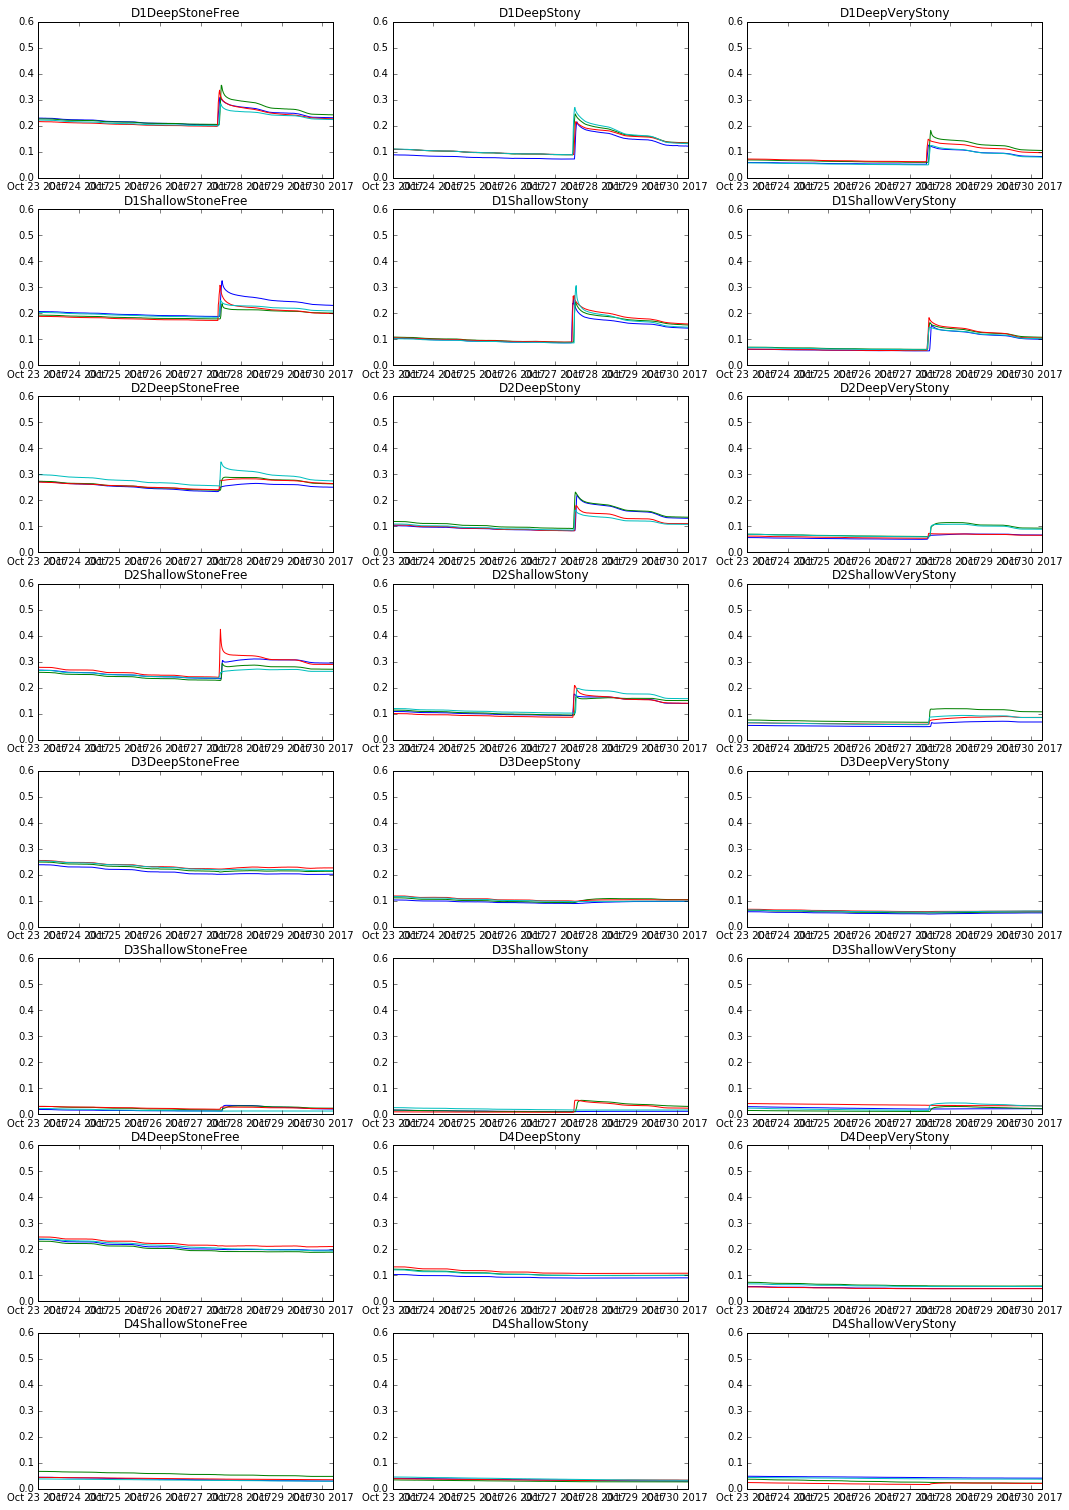

In [5]:
Depths = ['D1','D2','D3','D4']
Gravels = ['Deep','Shallow']
Stones = ['StoneFree','Stony','VeryStony']

Graph = plt.figure(figsize=(18,80))

Pos = 1
for Depth in Depths:    
    for Grav in Gravels:
        for Ston in Stones:
            fig = Graph.add_subplot(24,3,Pos)
            plt.plot(Data.ix[StartDateString::,(Depth,Grav,Ston)].index,Data.ix[StartDateString::,(Depth,Grav,Ston)])
            Pos +=1
            plt.ylim(0,0.6)
            plt.title(Depth+Grav+Ston)

In [6]:

##Graph treatment means by layer

C:\Anaconda\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning:

The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.



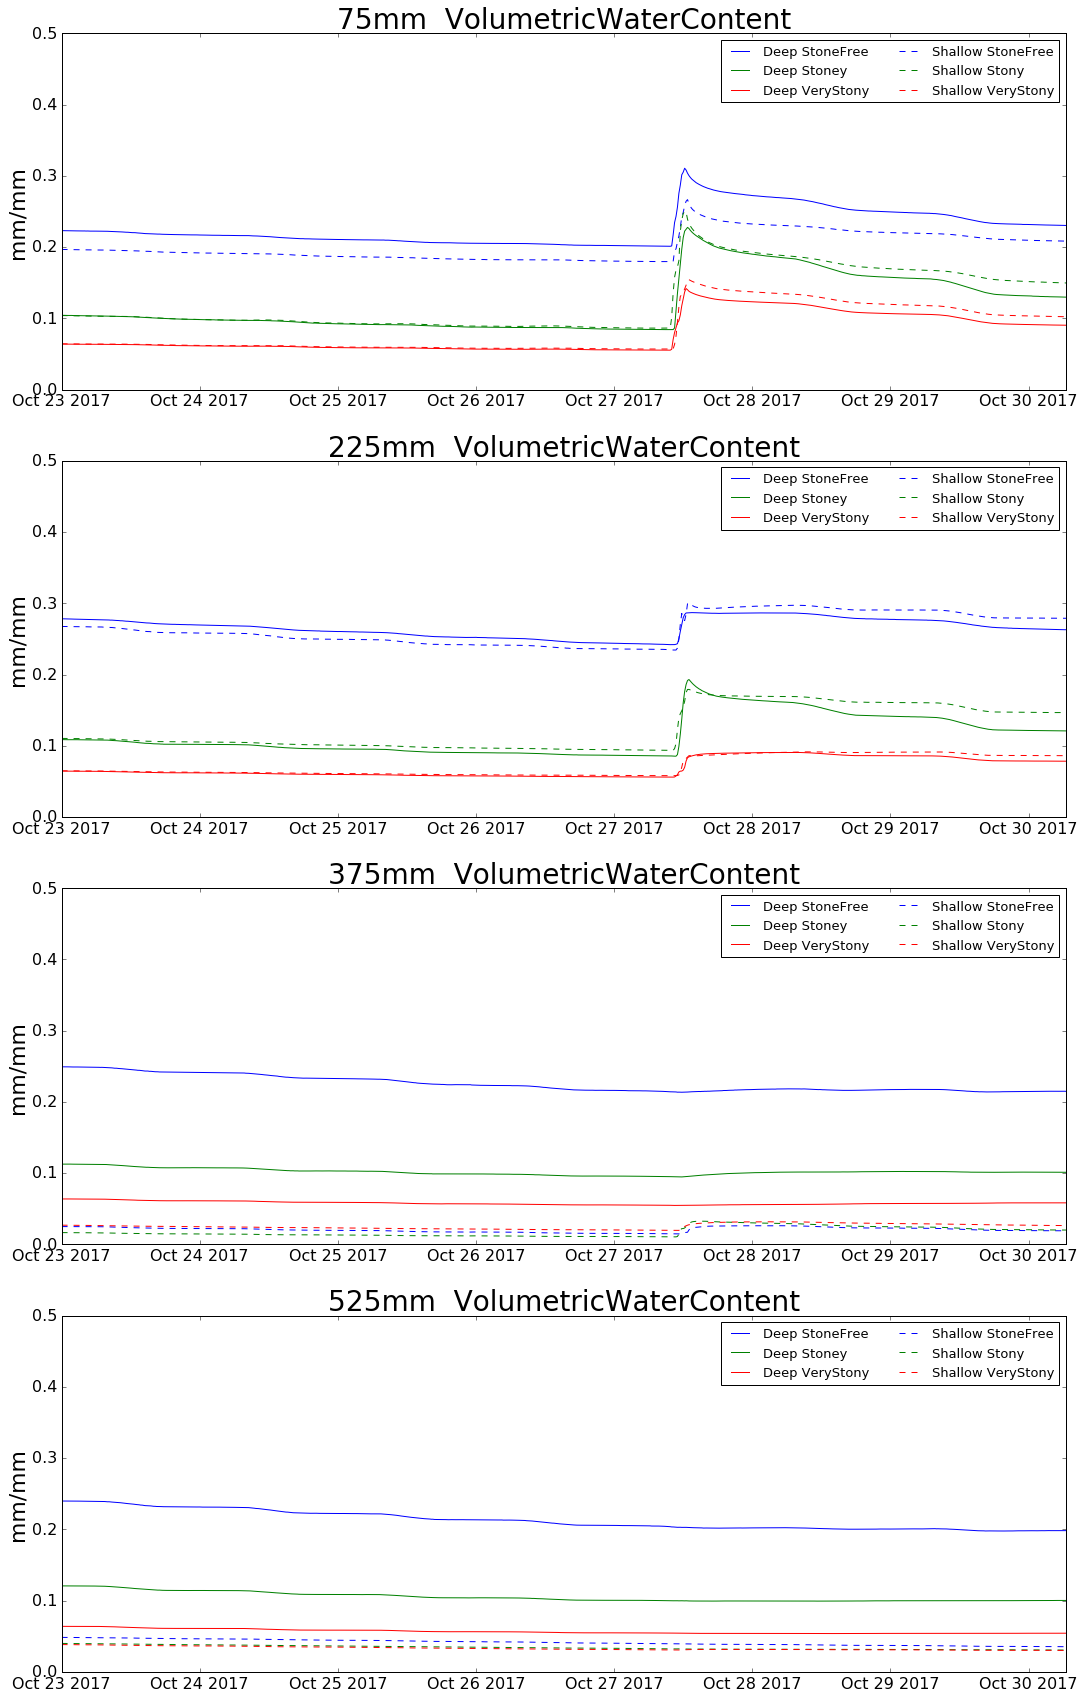

In [7]:
MeanLookSlice =  Data.ix['2014-11-05 08:00:00':].groupby(level=['Gravels','Stones','Depth'],axis=1).mean()

MeanLookSlice = MeanLookSlice.ix[StartDateString:]
MeanLookSlice.where(MeanLookSlice<0.7,np.nan,inplace=True)


Fig = plt.figure(figsize=(18, 60))

def MakePlot(Position, Depth, LayerThickness, Ymax, DepthLabel):
        Fig.add_subplot(8,1,Position, color_cycle=['b','g','r','b','g','r'])
        plt.title(DepthLabel + '  VolumetricWaterContent', fontsize=28);
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.StoneFree.ix[StartDateString:,Depth]*LayerThickness, '-', label='Deep StoneFree');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.Stony.ix[StartDateString:,Depth]*LayerThickness, '-', label='Deep Stoney');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Deep.VeryStony.ix[StartDateString:,Depth]*LayerThickness,'-', label='Deep VeryStony');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.StoneFree.ix[StartDateString:,Depth]*LayerThickness, '--', label='Shallow StoneFree');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.Stony.ix[StartDateString:,Depth]*LayerThickness, '--', label='Shallow Stony');
        plt.plot(MeanLookSlice.index,MeanLookSlice.Shallow.VeryStony.ix[StartDateString:,Depth]*LayerThickness, '--', label='Shallow VeryStony');
        plt.ylabel('mm/mm', fontsize=22);
        plt.tick_params(labelsize=16);
        plt.ylim(0,Ymax);
        plt.legend(loc=1, fontsize=13, ncol=2)
        return;

MakePlot(1,'D1',1,.5, '75mm')
MakePlot(2,'D2',1,.5, '225mm')
MakePlot(3,'D3',1,.5, '375mm')
MakePlot(4,'D4',1,.5, '525mm')

In [8]:
ProfileWater.ix['2014-11-05 08:00:00':,('Deep','StoneFree')]

2017-01-01 08:00:00    178.673673
2017-01-01 08:15:00    178.613870
2017-01-01 08:30:00    178.592325
2017-01-01 08:45:00    178.470344
2017-01-01 09:00:00    178.441267
2017-01-01 09:15:00    178.348282
2017-01-01 09:30:00    178.289748
2017-01-01 09:45:00    178.236750
2017-01-01 10:00:00    178.176947
2017-01-01 10:15:00    178.091551
2017-01-01 10:30:00    178.019788
2017-01-01 10:45:00    177.934876
2017-01-01 11:00:00    177.831660
2017-01-01 11:15:00    177.775502
2017-01-01 11:30:00    177.707222
2017-01-01 11:45:00    177.621907
2017-01-01 12:00:00    177.558459
2017-01-01 12:15:00    177.480191
2017-01-01 12:30:00    177.415475
2017-01-01 12:45:00    177.322086
2017-01-01 13:00:00    177.252456
2017-01-01 13:15:00    177.203426
2017-01-01 13:30:00    177.102909
2017-01-01 13:45:00    177.027178
2017-01-01 14:00:00    176.928956
2017-01-01 14:15:00    176.881817
2017-01-01 14:30:00    176.789616
2017-01-01 14:45:00    176.696470
2017-01-01 15:00:00    176.608940
2017-01-01 15:

In [9]:
from plotly.graph_objs import *

DeepStoneFree = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Deep','StoneFree')],
                        name = 'Deep StoneFree',
                        line = Line(color = 'blue', dash ='solid')
                       )

ShallowStoneFree = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Shallow','StoneFree')],
                           name = 'Shallow StoneFree',
                           line = Line(color = 'blue', dash ='dash')
                           )
DeepStony = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Deep','Stony')],
                        name = 'Deep Stony',
                        line = Line(color = 'green', dash ='solid')
                       )

ShallowStony = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Shallow','Stony')],
                           name = 'Shallow Stony',
                           line = Line(color = 'green', dash ='dash')
                           )
DeepVeryStony = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Deep','VeryStony')],
                        name = 'Deep VeryStony',
                        line = Line(color = 'red', dash ='solid')
                       )

ShallowVeryStony = Scatter(x=ProfileWater.ix['2014-11-05 08:00:00':].index,
                        y=ProfileWater.ix['2014-11-05 08:00:00':,('Shallow','VeryStony')],
                           name = 'Shallow VeryStony',
                           line = Line(color = 'red', dash ='dash')
                           )

data = Data([DeepStoneFree, ShallowStoneFree, DeepStony, ShallowStony, DeepVeryStony, ShallowVeryStony])

py.iplot(data, filename = 'basic-line')

PlotlyLocalCredentialsError: 
Couldn't find a 'username', 'api-key' pair for you on your local machine. To sign in temporarily (until you stop running Python), run:
>>> import plotly.plotly as py
>>> py.sign_in('username', 'api_key')

Even better, save your credentials permanently using the 'tools' module:
>>> import plotly.tools as tls
>>> tls.set_credentials_file(username='username', api_key='api-key')

For more help, see https://plot.ly/python.


In [ ]:
py.sign_in(username='HamishBrown',
                         api_key='e7di0t5cxu')

In [ ]:
#!gist -p -d "Setting up Soil summary for Export" SoilWaterAnalysis.ipynb

In [ ]:
#!gist -u https://gist.github.com/604c4dfd746733297790 SoilWaterAnalysis.ipynb